# Data exploration

In this notebook, we are going to explore the data and get insight into its properties and thus prepare it for classification.

First, we are going to import the necessary packages to run the operations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

%matplotlib inline

Next, we are going to merge the 3 tables composing our data using the CustomerID key.

In [2]:
customer_demographics = pd.read_csv('AdvWorksCusts.csv')
monthly_expenditure = pd.read_csv('AW_AveMonthSpend.csv')
bike_buyers = pd.read_csv('AW_BikeBuyer.csv')
total_details=customer_demographics.merge(monthly_expenditure,on="CustomerID")
total_details.to_csv("total_details.csv")
total_bike_details = total_details.merge(bike_buyers,on="CustomerID")
total_bike_details.to_csv("total_bike_details.csv")

To get a glimpse upon the contents of the data, we would use the built-in pandas' describe() function. This will show us, the counts, mean, std and other metrics of the numeric columns in our dataset.

In [3]:
total_bike_details.describe()

CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count  17209.000000   17209.000000     17209.000000          17209.000000   
mean   20200.378523       0.672671         1.508106              0.997211   
std     5354.643340       0.469252         1.137949              1.519436   
min    11000.000000       0.000000         0.000000              0.000000   
25%    15531.000000       0.000000         1.000000              0.000000   
50%    20157.000000       1.000000         2.000000              0.000000   
75%    24850.000000       1.000000         2.000000              2.000000   
max    29482.000000       1.000000         4.000000              5.000000   

       TotalChildren   YearlyIncome  AveMonthSpend     BikeBuyer  
count   17209.000000   17209.000000   17209.000000  17209.000000  
mean        2.016096   78084.818700      72.494625      0.331513  
std         1.685089   39616.621179      27.374399      0.470771  
min         0.000000    9482.000000      22.000000      0.000000  
25%         0.000000   47773.000000      52.000000      0.000000  
50%         2.000000   76090.000000      68.000000      0.000000  
75%         3.000000  105065.000000      84.000000      1.000000  
max         5.000000  196511.000000     176.000000      1.000000

We will drop customerID column, since it isn't a feature.

In [4]:
total_bike_details.drop(["CustomerID"], axis=1, inplace=True)

Other columns are also useless. But since we are exploring, for now, we will focus on the ones that need to be examined. These will be Gender, MaritalStatus, HomeOwnerFlag, NumberCarsOwned, NumberChildrenAtHome, TotalChildren, YearlyIncome, AveMonthSpend and the future label for classification - BikeBuyer. Furthermore, we will recode the Birthdate into a column holding the age.

In [5]:
total_bike_details.head()

Title  FirstName MiddleName LastName Suffix         AddressLine1  \
0   NaN        Jon          V     Yang    NaN      3761 N. 14th St   
1   NaN     Eugene          L    Huang    NaN           2243 W St.   
2   NaN      Ruben        NaN   Torres    NaN     5844 Linden Land   
3   NaN    Christy        NaN      Zhu    NaN     1825 Village Pl.   
4   NaN  Elizabeth        NaN  Johnson    NaN  7553 Harness Circle   

  AddressLine2         City StateProvinceName CountryRegionName  ...  \
0          NaN  Rockhampton        Queensland         Australia  ...   
1          NaN      Seaford          Victoria         Australia  ...   
2          NaN       Hobart          Tasmania         Australia  ...   
3          NaN   North Ryde   New South Wales         Australia  ...   
4          NaN   Wollongong   New South Wales         Australia  ...   

     Occupation Gender MaritalStatus HomeOwnerFlag NumberCarsOwned  \
0  Professional      M             M             1               0   
1  Professional      M             S             0               1   
2  Professional      M             M             1               1   
3  Professional      F             S             0               1   
4  Professional      F             S             1               4   

  NumberChildrenAtHome TotalChildren  YearlyIncome  AveMonthSpend  BikeBuyer  
0                    0             2        137947             89          0  
1                    3             3        101141            117          1  
2                    3             3         91945            123          0  
3                    0             0         86688             50          0  
4                    5             5         92771             95          1  

[5 rows x 24 columns]

Two new columns are recoded here - age and age_group. Age would hold the years since birth and age_group would categorize them into 4 different groups: "below 25", "between 25 and 45", "between 45 and 55" and "above 55".

In [6]:
def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
total_bike_details['age'] = total_bike_details['BirthDate'].apply(calculate_age)

total_bike_details['age_group'] = pd.cut(total_bike_details.age, [0,25,45,55,99], include_lowest=True)




Next, we are going to look through some common metrics of the cases like income and average monthly expenditure level. These would be plotted against demographic variables such as Occupation, Gender, Age_group, Marital status and number of children. We are looking for significant differences between the categories.

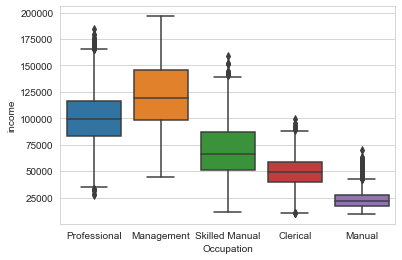

In [7]:
        sns.set_style("whitegrid")
        sns.boxplot('Occupation', 'YearlyIncome', data=customer_demographics)
        plt.xlabel('Occupation') # Set text for the x axis
        plt.ylabel('income')# Set text for y axis
        plt.show()

As we could see from the chart above, the median income of people with management occupation is significantly higher, than the ones with the skilled manual. Although the professional occupation seems to have a lot of outliers, it is also distinct from skilled manual occupation.

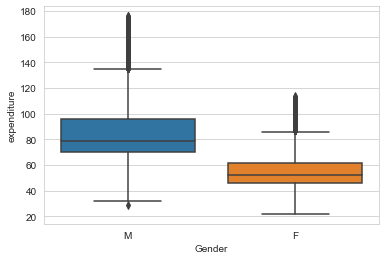

In [8]:
        sns.set_style("whitegrid")
        sns.boxplot('Gender', 'AveMonthSpend', data=total_bike_details)
        plt.xlabel('Gender') # Set text for the x axis
        plt.ylabel('expenditure')# Set text for y axis
        plt.show()
  

Across genders, males have distinctly higher median expenditure than females. One should keep in mind that there are a lot of outliers.

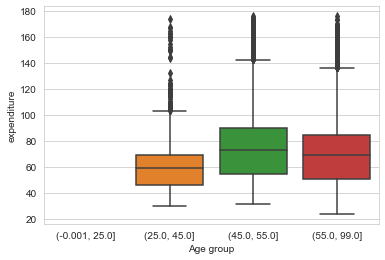

In [9]:
        sns.set_style("whitegrid")
        sns.boxplot('age_group', 'AveMonthSpend', data=total_bike_details)
        plt.xlabel('Age group') # Set text for the x axis
        plt.ylabel('expenditure')# Set text for y axis
        plt.show()

The median monthly expenditure of the age group 45 to 55 is the highest, but with a low difference compared to the group above 55. Its difference with 25 to 45 is however more significant.

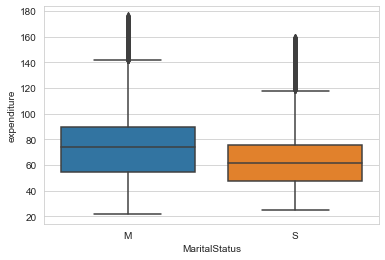

In [10]:
        sns.set_style("whitegrid")
        sns.boxplot('MaritalStatus', 'AveMonthSpend', data=total_bike_details)
        plt.xlabel('MaritalStatus') # Set text for the x axis
        plt.ylabel('expenditure')# Set text for y axis
        plt.show()

In terms of marital status, married individuals have higher median expenditure, although there are a lot of outliers on both sides.

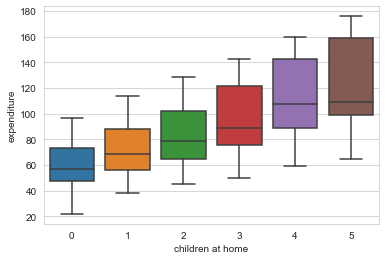

In [11]:
        sns.set_style("whitegrid")
        sns.boxplot('NumberChildrenAtHome', 'AveMonthSpend', data=total_bike_details)
        plt.xlabel('children at home') # Set text for the x axis
        plt.ylabel('expenditure')# Set text for y axis
        plt.show()

One could spot an increase in the median monthly expenditure with the number of children at home increasing. The interesting thing is that the difference between 3 and 4 children looks to be significant, whereas between 4 and 5 is nearly unrecognizable.

Before we go through the individual variables, we have to check the label's class balance in our sample. That is how many people have bought a bike and how many haven't.

In [12]:
BikeBuyer_counts = total_bike_details['BikeBuyer'].value_counts()
print(BikeBuyer_counts)

0    11504
1     5705
Name: BikeBuyer, dtype: int64


As you can see, there is a significant class imbalance towards non-buyers. The bike buyers represent a little over 30% of all cases.

Next, we are going to see how the bike ownership status is depending on the number of cars owned, the number of children at home, total children, yearly income and age.

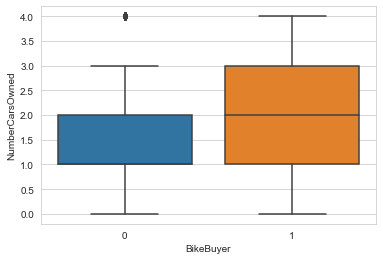

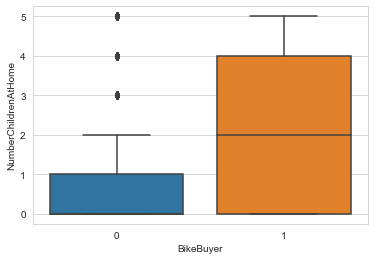

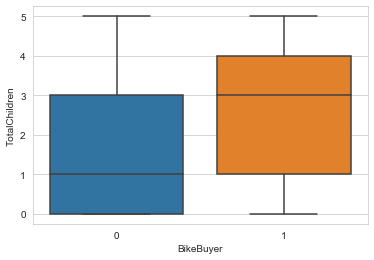

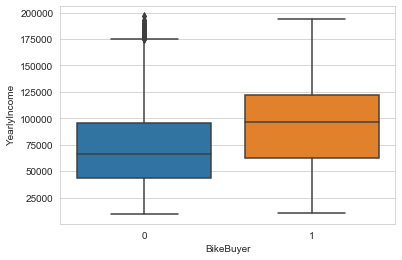

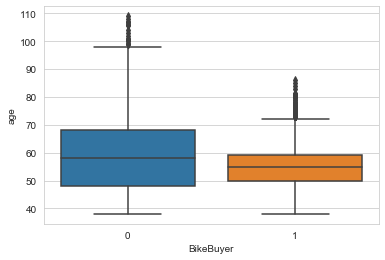

In [13]:
def plot_box(bike_details, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=bike_details)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['NumberCarsOwned', 'NumberChildrenAtHome',
            'TotalChildren', 'YearlyIncome', 'age']
plot_box(total_bike_details, num_cols)

There are a couple of interesting things going on with the charts we've just made. It looks like the bike owners have a higher median of the number of cars, the number of children at home, the total number of children and yearly income.

Next, we are going to check the number of bike owners across the three categorical variables - Occupation, Gender, and MaritalStatus. We have to keep in mind, that our sample contains only 30% bike buyers and this makes the cases more likely not to be bike buyers.

Occupation


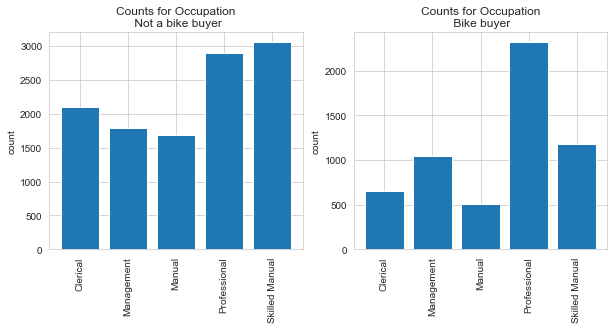

Gender


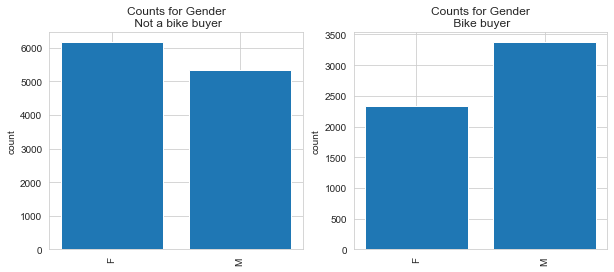

MaritalStatus


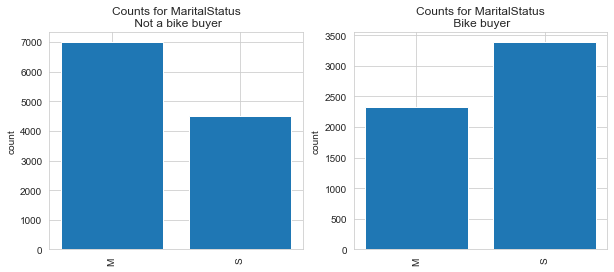

In [14]:
import numpy as np
cat_cols = ['Occupation', 'Gender', 'MaritalStatus']

total_bike_details['dummy'] = np.ones(shape = total_bike_details.shape[0])
for col in cat_cols:
    print(col)
    counts = total_bike_details[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Not a bike buyer')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bike buyer')
    plt.ylabel('count')
    plt.show()

It looks like all three categorical variables have distinct distributions for each label category. This would be useful for our classification.